# About
<br>
 <b>Entry:</b> Data Science society Datathlon 2018
 <br><b>Case:</b> SAP Case
 <br><b>Dataset:</b> <a href="https://fdibatusofia-my.sharepoint.com/personal/pnikolov_fdiba_tu-sofia_bg/Documents/Forms/All.aspx?slrid=ce11499e-b05e-5000-10fd-9e61d4c16eca&FolderCTID=0x012000658541D2E1754F44876F9448FAF6F5CB&id=%2Fpersonal%2Fpnikolov_fdiba_tu-sofia_bg%2FDocuments%2FDatathon_2018%2FSAP">available here</a>
 <br><b>Authors:</b> Hristo Piyankov (hpiyankov@gmail.com)
 <br><b>Notes:</b> not all caclulations and graphs are carried out in python, due to time constraints

# Business understanding


Goal of the study is to udnerstand drivers behind sales up-lift with relation to the company's own pricing strategies, promostions and competitors.'Identify possible action points for optimisation of sales and revenue. 

# Data understading

## Sample

Sample from the provided dataset with basic statistics is shown below

In [1]:
import pandas as pd

In [2]:
path = "/home/hpiyankov/Documents/Datathlon/Datathlon 2018/"
df = pd.read_excel(path+"data.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
Week                 146 non-null int64
VOLUME_OF_SALES      146 non-null int64
ACTUAL_PRICE         146 non-null float64
COMPETITOR1_PRICE    146 non-null float64
COMPETITOR2_PRICE    146 non-null float64
COMPETITOR3_PRICE    146 non-null float64
COMPETITOR4_PRICE    146 non-null float64
COMPETITOR5_PRICE    146 non-null float64
COMPETITOR6_PRICE    146 non-null float64
COMPETITOR7_PRICE    146 non-null float64
TYPE_OF_PROMOTION    84 non-null object
dtypes: float64(8), int64(2), object(1)
memory usage: 12.6+ KB


In [4]:
df.head()

,Week,VOLUME_OF_SALES,ACTUAL_PRICE,COMPETITOR1_PRICE,COMPETITOR2_PRICE,COMPETITOR3_PRICE,COMPETITOR4_PRICE,COMPETITOR5_PRICE,COMPETITOR6_PRICE,COMPETITOR7_PRICE,TYPE_OF_PROMOTION
0,1,103188,1.011,0.674,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2,93420,1.003,0.715,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,3,78636,0.990,0.707,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,4,36840,0.955,0.703,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,5,74880,1.072,0.711,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Observations

Data consist of company's price and sales volumes data, on a weekly level, promotion information, plus information for 7 competiors and their pricing. Data is rather scarce at only 146 observations. 

# Data preparation

## Basic modifications

Needed data modifications:
<br>
<ul>
<li> Competitors data is coded as 0 for missing data. Those need to be recoded to nulls and proper aggregations done.</li>
<li> Type of promition to be recoded to dummy variables.We have 5 promitions and months with no promitions, thus 5 dummy variables are created:PROMOTION_A...PRMOMOTION_E.</li>
<ul>

## Outliers and normalization

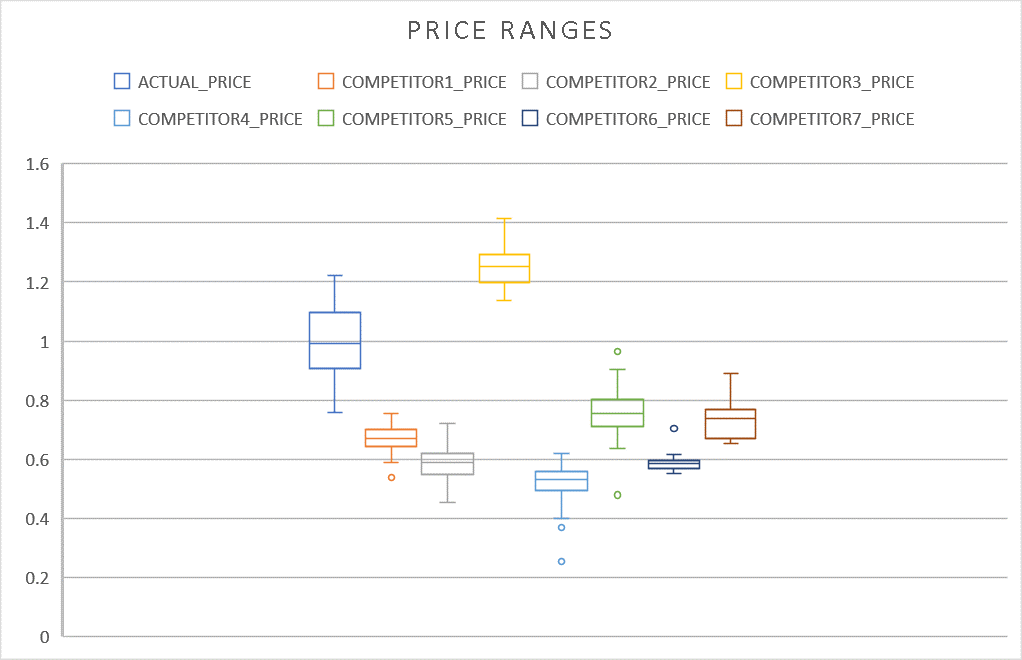

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = path+"BoxPlt.png", width=800, height=600)

The data is not signifficantly dispersed and the averages of the boxplots, are well within 3-4x of each other. There are a few outliers, but they are not too far off the averages. Based on this, neither normalization, nor outlier handling is really nessecary.

## Sales fluctuations (looking for seasonality)

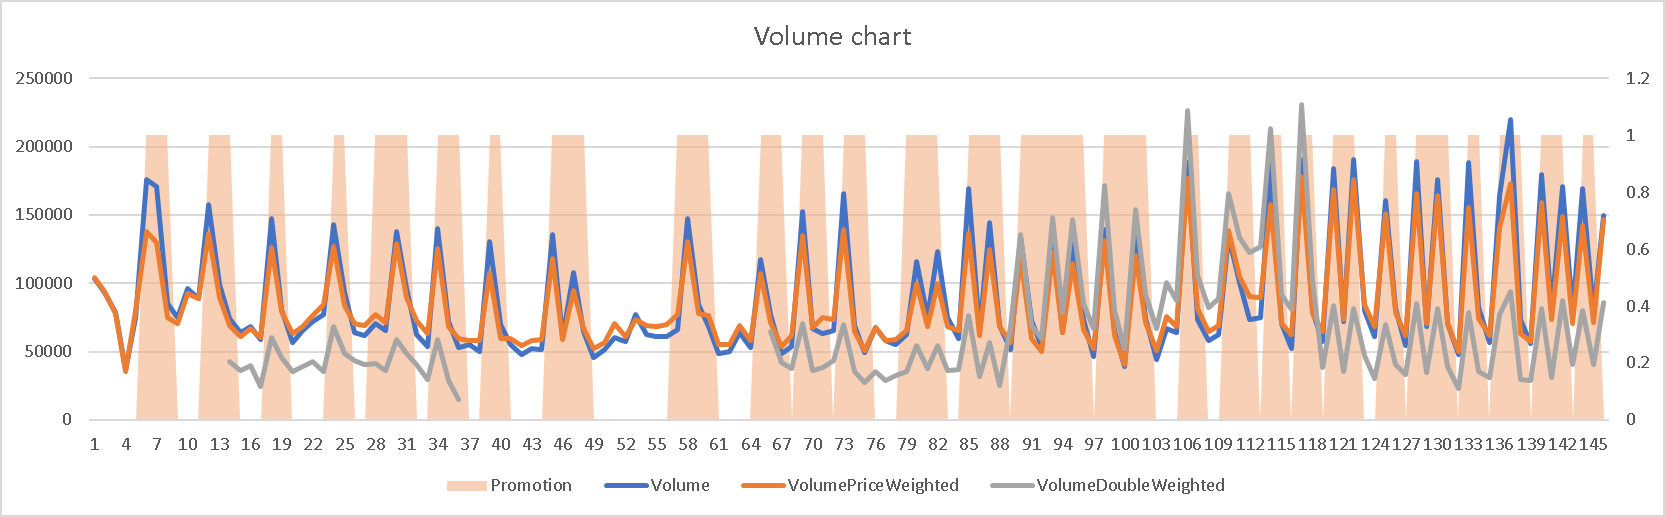

In [6]:
Image(filename = path+"Volume.png", width=1000, height=600)

<b>Legend:</b>
<ul><li> Promotion: (pink) periods, when there was any promotion active.
    <li> Volume: (blue) sales volume during this period</li>
    <li> Volume per price: (orange) (sales volume) x (price for the period) </li>
    <li> Double weighted: (gray) (sales volume) x (price for the period) x MIN(competitor price for the period). </li></ul>

<b>Intepretation:</b><ul>
    <li>Price does not appear to be a signifficant factor when it comes to sales volumes. The sales and the price weighted sales are almost identical</li>
    <li>Competitors minial price or the lack thereof (surprisingly) also does not seem to play a major role in the sales volume. One notable exception are weeks 88 - 121 where there is a notable inversion in te trend of competitor prices - it does lead to sales increase, which however is barely noticable.</li>
    <li>The major factor driving sales fluctuations appears to be the prmotions. The positive takeaway here is that they do not seem to be overwhelmingly price-related (or at least to a very low extend)</li>
    <li>Further analysis of the sales fluctionations needs to split the data set between periods of promitions and non promotions</li></ul>

<b>Correlations:</b>

 | Sales | Price | Min Competitor price
------------- |:-------------:| -----:|
Price |-0.71|  |  |
Min Competitor price |-0.06 |0.16 |
Has promotion |0.53|-0.63 |0.03 |

<b>Intepretation:</b><ul>
    <li>It is safe to say that Sales fluctuations are tightly correlated with the price, which in turn is mainly driven by the promotions.</li>
    <li>Competitors do not appear to be a signifficant factor. Their price is not correlated with the Sales at all, and has bary any correlation with out price. Last but nto least they do not appear to react in any way to our promortions.</li>
    <li>The major factor driving sales fluctuations appears to be the prmotions. The positive takeaway here is that they do not seem to be overwhelmingly price-related (or at least to a very low extend)</li>
    <li>Further analysis of the sales fluctionations needs to split the data </ul>

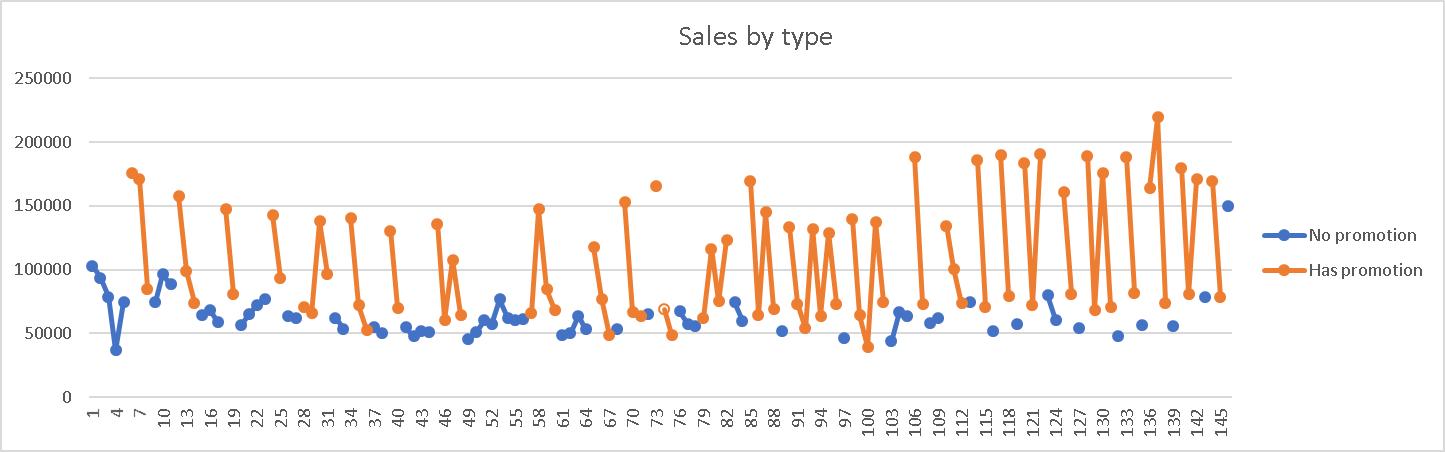

In [7]:
Image(filename = path+"SalesByType.png", width=1000, height=600)

<b>Intepretation:</b><ul>
    <li> Blue dots = Sales volume during no promotions; Orange dots = Sales volume during promotions</li>
    <li>The frequent switch between promotion and non-promotion periods, makes it hard to judge weather we can talk about seasonality or not. Overall, even if seasonality is present, it is very hard to detect and thus of no signifficant consequence.</li>
    <li>An interseting observaton is the sharp jump and subsequent sharp drop after each prmotion start. This is worth examining further.</li>
    </ul>

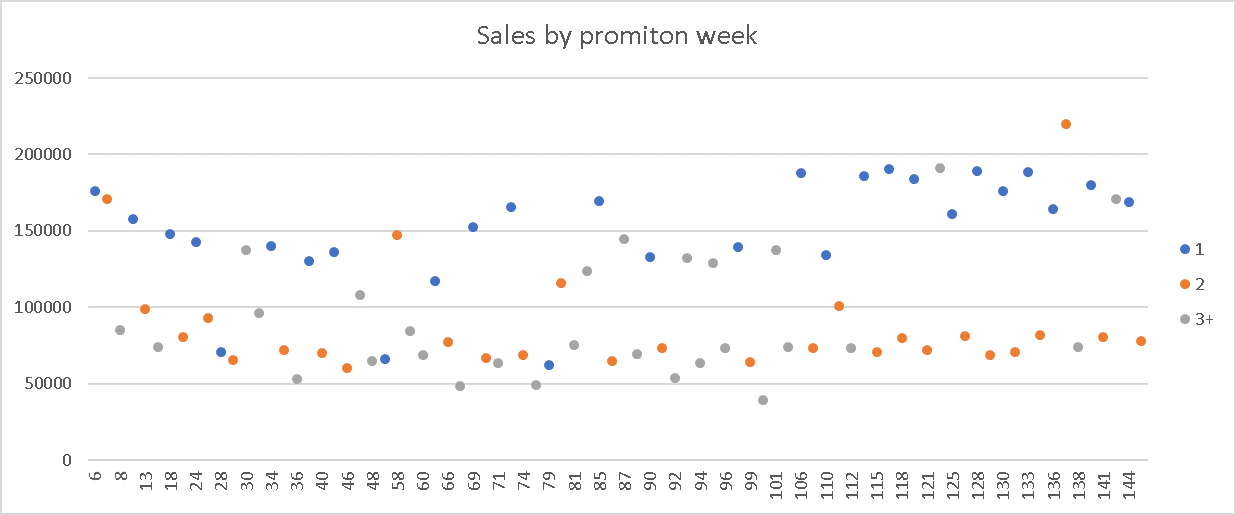

In [8]:
Image(filename = path+"SalesByPromotionWeek.png", width=1000, height=600)

<b>Intepretation:</b><ul>
    <li>Blue dots = Sales volume during the first week of a promotion; Orange dots = Sales volume during third week of a promotion; Gray dots = Sales volume during 3+ week of a promotion</li>
    <li>When we further break down the promotions by week running, it becomes quickly apparent that the first week of the prmotion is almost always the "star" followed by a bottom in week 2. There is some fluctuation in week 3, but again it is rather on the down side. </li>
    <li>The next question here is, does it make sense to run a promotion past week 1 ?</li>
    </ul>

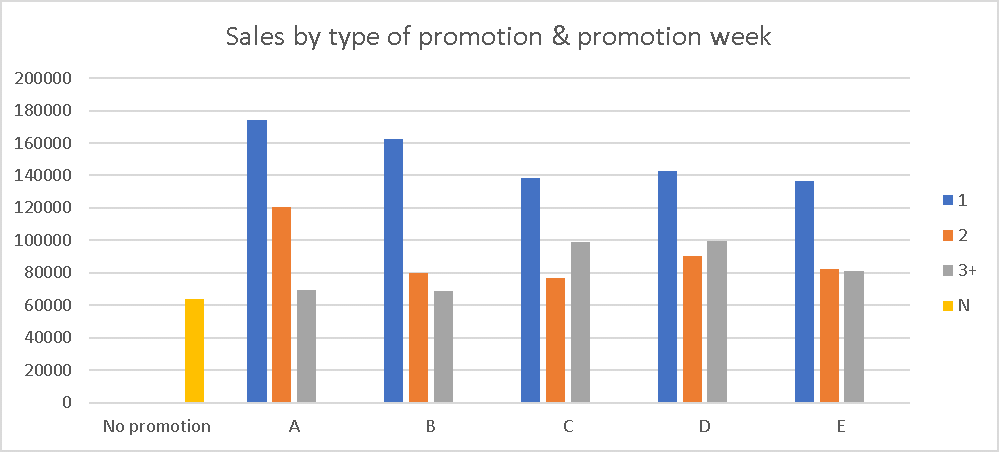

In [9]:
Image(filename = path+"SalesByPromotionWeek2.png", width=1000, height=600)

<b>Intepretation:</b><ul>
    <li> Horisontal axis = Running promotion or not; Bar colors = consecutive week of the prmotion; Bar height = average sales volume.</li>
    <li>It quickly becomes apparent that week 1 is always the strongest week in any promotion. </li>
    <li>Sales in weeks 3+ for promotion types A and B are almost indistinguishable from having no promotion at all.</li>
    <li>Promotion types C, D and E still see some uplift in weeks 3+</li>
    <li>All this drives the questions - does it financially make sense to run promotions past week 1?</li>
    </ul>

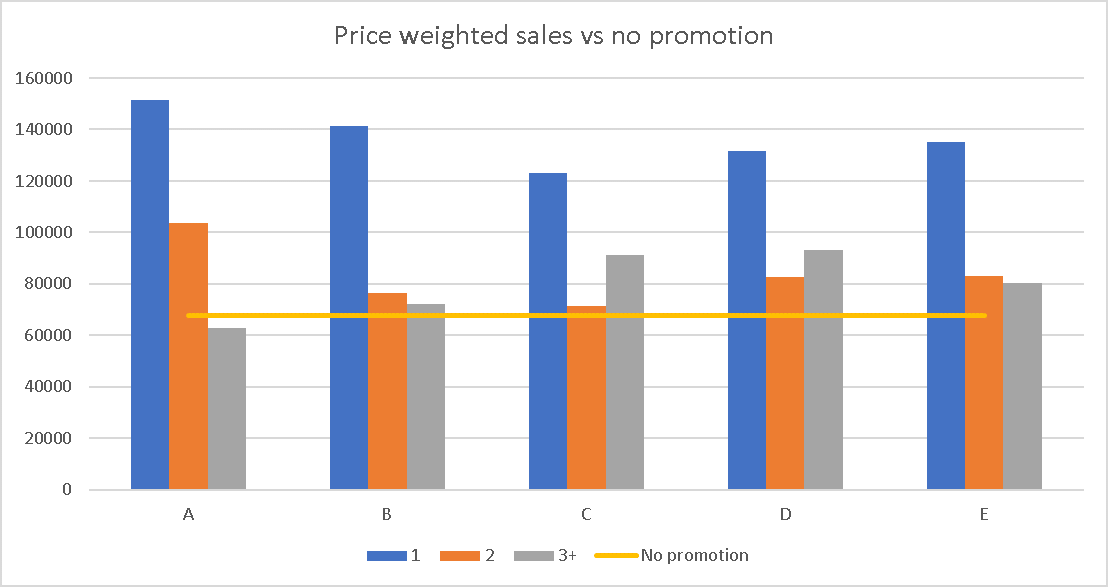

In [10]:
Image(filename = path+"PriceWeightProm.png", width=1000, height=600)

<b>Intepretation:</b><ul>
      <li> Horisontal axis = Running promotion or not; Bar colors = consecutive week of the prmotion; Bar height = average sales volume; Yellow line: average sales volume during non-promotion period.</li>
    <li>Answer to the above question is: if there is any additional costs to running a prmotion, apart from the price reduction, it generally does not make sense to run it past week 1. </li>
    <li>Even if there is no additonal cost, any form of Sales usually has implicit costs, like cost of goods, cost of FTEs etc. Any reduction in prices, generally drives the margins thin, and unless there is good enough incentive (a lot more sales) it does not make sense to reduce the prices.</li>
    </ul>

<b>Final observations</b><ul>
    <li>Majority of the variable enginnering efforts need to be concentrated around our own price fluctuations and promotions. </li>
    <li>Competitor activity is rather insignifficant, so the variables created, which are related to it can be minimal.</li>
    <li>The target variable, which will be optimized needs to reflect both the sales and the price. Given that the price is driven by promotions, an open topic remains what is the cost of those promotions? Is it only the reduction in the price? are there any advertising costs associated with it? We need to know this because, past week 1 of the promotions the effects wear off rapidly, in case there is any running cost associated with running the promotions past week 1, it might make sense not to keep them.</li>
    </ul>


## Variable enginnering

Based on the analysis and observations above, below is the final list of variables used for the modelling part.

Variable | Type | Description | Reasoning | Imputation of missing variables
------:|-------:|------:|------:|-------:|
WSales|Target, continious|Sales X Price|Our target variable needs to reflect the cost of running a promotion| None |
PROMOTION_A...PROMOTION_E|Binary|5 Dummy variables for all of the campaigns + nulls || None |
HAS_PROMOTION|Binary|Flag if the customer is in any prmotion || None |
TIME_SINCE_LAST_PROM|Continious|Number of days between current and previous promotion ended|To track if spacing between prmotions plays a role| Fixed value: -1
LAST_PROM_DUR|Conitious|Duration of the last prmotion|Monitor impact of previous promotion duration on the current sales | Fixed value: 0
PROMOTION_WEEK|Continious|Consecutive week in which the promotion is running || None |
PROMOTION_MAV5|Continious|Moving average of HAS_PROMOTION for the last 5 weeks|Measure the customer's saturation to promotions |Constant: 0, only applicable to first 4 weeks.
PROMOTION_MAV10|Continious|Moving average of HAS_PROMOTION for the last 10 weeks|Measure the customer's saturation to promotions | Constant: 0, only applicable to first 4 weeks, then MAV 5-9
PRICE|Continious|Original price variable| |None|
PRICE_CHANGE|Continious|Current price / previous period price -1 |One major effect of prmotions is change in price, we want to capture the immediate change here | Constant: 0, only applicable to first week.
PRICE_SLOPE5|Continious|Slope of the price for the last 5 periods| Majority of capmpaigns run for an average of 3 days. We want to capture the effects of having multiple campaigns close to one annother, as opposed newer campagins.| Constant 0, only applicable to first 4 weeks.
PRICE_SLOPE10|Continious|Slope of the price for the last 10 periods|Same as above, just a longer period | Constant: 0, only applicable to first 4 weeks, then MAV 5-9
HAS_COMPETITOR|Binary| Flag if currenty any competitor has an active price |
COMPETITOR_MIN|Continious|MIN(Competitor 1...7 price) | For price sensitive customers | 5 period forward moving average
COMPETItOR_AVG|Continious|AVG(Competitor 1...7 price) | Median would make more sense but data is too scarce. | 5 period forward moving average
PRICE_TO_COMP_MIN|Continious| Our price / MIN(Competiror price) -1| Monitor spread to competitors | None
PRICE_TO_COMP_AVG|Continious| Our price / AVG(Competiror price) -1| Monitor spread to competitors | None
COMP_PRICE_CHANGE_MIN|Continious|Current competitor min price / previous period competiotr min price -1 | How do competitor discouns affect us |  Constant: 0, only applicable to first week.
COMP_PRICE_CHANGE_AVG|Continious|Current competitor avg price / previous period competiotr  avg price -1| How do competitor discouns affect us |  Constant: 0, only applicable to first week.
COMP_SLOPE5_MIN|Continious|Slope of the minimum competior price for the last 5 periods| Monitor the rate of the competior price change| Constant 0, only applicable to first 4 weeks.
COMP_SLOPE5_AVG|Continious|Slope of the minimum competior price for the last 5 periods| Monitor the rate of the competior price change| Constant 0, only applicable to first 4 weeks.


## Final dataset

In [11]:
df2 = pd.read_excel(path+"final.xlsx")

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 25 columns):
Wprice                   146 non-null float64
PROMOTION_A              146 non-null int64
PROMOTION_B              146 non-null int64
PROMOTION_C              146 non-null int64
PROMOTION_D              146 non-null int64
PROMOTION_E              146 non-null int64
HAS_PROMOTION            146 non-null int64
TIME_SINCE_LAST_PROM     146 non-null int64
LAST_PROM_DUR            146 non-null int64
PROMOTION_WEEK           146 non-null int64
PROMOTION_MAV5           146 non-null float64
PROMOTION_MAV10          146 non-null float64
PRICE                    146 non-null float64
PRICE_CHANGE             146 non-null float64
PRICE_SLOPE5             146 non-null float64
PRICE_SLOPE10            146 non-null float64
HAS_COMPETITOR           146 non-null int64
COMPETITOR_MIN           146 non-null float64
COMPETITOR_AVG           146 non-null float64
PRICE_TO_COMP_MIN        146 non-null flo

In [13]:
df2.tail(10)

,Wprice,PROMOTION_A,PROMOTION_B,PROMOTION_C,PROMOTION_D,PROMOTION_E,HAS_PROMOTION,TIME_SINCE_LAST_PROM,LAST_PROM_DUR,PROMOTION_WEEK,...,PRICE_SLOPE10,HAS_COMPETITOR,COMPETITOR_MIN,COMPETITOR_AVG,PRICE_TO_COMP_MIN,PRICE_TO_COMP_AVG,COMP_PRICE_CHANGE_MIN,COMP_PRICE_CHANGE_AVG,COMP_SLOPE5_MIN,COMP_SLOPE5_AVG
136,172624.464,1,0,0,0,0,1,1,2,2,...,-0.010248,1,0.544,0.718286,0.444853,0.094272,-0.007299,-0.028781,0.0145,0.009114
137,63162.528,1,0,0,0,0,1,1,2,3,...,-0.018394,1,0.472,0.696571,0.813559,0.228876,-0.132353,-0.030231,0.0036,-0.001586
138,57399.840,0,0,0,0,0,0,-1,3,0,...,-0.006697,1,0.500,0.737286,1.060000,0.397016,0.059322,0.058450,-0.0080,-0.002586
139,158749.272,0,0,1,0,0,1,1,3,1,...,-0.009400,1,0.514,0.712571,0.717899,0.239174,0.028000,-0.033521,-0.0112,-0.003500
140,73502.520,0,0,1,0,0,1,1,3,2,...,-0.005582,1,0.420,0.659857,1.166667,0.379086,-0.182879,-0.073978,-0.0206,-0.010086
141,148944.576,0,0,1,0,0,1,1,3,3,...,0.000164,1,0.585,0.790000,0.490598,0.103797,0.392857,0.197229,0.0146,0.010943
142,70645.608,0,0,0,0,0,0,-1,3,0,...,-0.004915,1,0.575,0.765250,0.566957,0.177393,-0.017094,-0.031329,0.0221,0.013336
143,142544.556,0,0,0,1,0,1,1,3,1,...,-0.008879,1,0.563,0.787750,0.497336,0.070136,-0.020870,0.029402,0.0253,0.025575
144,71467.488,0,0,0,1,0,1,1,3,2,...,0.004291,1,0.569,0.755000,0.606327,0.210596,0.010657,-0.041574,0.0276,0.018804
145,146753.040,0,0,0,0,0,0,-1,2,0,...,0.007473,1,0.585,0.770750,0.675214,0.271489,0.028120,0.020861,-0.0006,-0.004875


In [14]:
print(df2.describe())

              Wprice  PROMOTION_A  PROMOTION_B  PROMOTION_C  PROMOTION_D  \
count     146.000000   146.000000   146.000000   146.000000   146.000000   
mean    86657.821233     0.089041     0.095890     0.212329     0.123288   
std     34254.778199     0.285783     0.295454     0.410364     0.329899   
min     35182.200000     0.000000     0.000000     0.000000     0.000000   
25%     63188.616000     0.000000     0.000000     0.000000     0.000000   
50%     71419.518000     0.000000     0.000000     0.000000     0.000000   
75%    104487.300000     0.000000     0.000000     0.000000     0.000000   
max    178385.088000     1.000000     1.000000     1.000000     1.000000   

       PROMOTION_E  HAS_PROMOTION  TIME_SINCE_LAST_PROM  LAST_PROM_DUR  \
count   146.000000     146.000000            146.000000     146.000000   
mean      0.054795       0.575342              0.760274       3.061644   
std       0.228362       0.495992              2.018209       1.365701   
min       0.000000 

Out of this summary, we can see that HAS_COMPETITOR is 1 for all values, so go ahead and drop it.

In [15]:
df3 = df2.drop("HAS_COMPETITOR",axis=1)

In [16]:
df3.shape

(146, 24)

# Modeling

## Overview

Our main goal in the modeling part is not nessecarily to obtain the "perfect model" for predicting the sales volume, but rather to udnerstand how the different variables interact with each other in order to best structure future promotions and pricing.

Doing so, we need to use models which offer full transparency of the modeling process as opposed to "back box" model appraches.
<br>
<br>
<b> Good candidates:</b>
<br>Linear regression and it's "derivatives" (GLM, Lasso, Least squares, Polynomial, Feed-forward/Backwards/Stepwise)
<br>Decision trees
<br>Gradient boosting
<br>*(Note: Association analysis (Market basket) is an interesting candidate, however the data processing for it is substatially different that all other models)*
<br>
<br><b>"Maybe" candidates:</b>
<br>Random forest
<br>
<br><b>Bad candidates:</b>
<br>Neural networs
<br>Support vector machines
<br>Ensemble models

## Pre-processing

We might want to remove highy correlated variables up-front, to simplyfy later processing

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(14, 11))
corr = df3.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

It appears we do have some highly correlated variables, so let's look in detail (looking at cutoff above 0.75 correlation in either way)

In [18]:
corr["Index"] = corr.index
melted = corr.melt(id_vars=["Index"])
melted[(melted["Index"] != melted["variable"]) & (abs(melted["value"]) > 0.75)]

,Index,variable,value
151,TIME_SINCE_LAST_PROM,HAS_PROMOTION,0.751904
153,PROMOTION_WEEK,HAS_PROMOTION,0.759700
174,HAS_PROMOTION,TIME_SINCE_LAST_PROM,0.751904
222,HAS_PROMOTION,PROMOTION_WEEK,0.759700
251,PROMOTION_MAV10,PROMOTION_MAV5,0.789757
274,PROMOTION_MAV5,PROMOTION_MAV10,0.789757
402,PRICE_TO_COMP_MIN,COMPETITOR_MIN,-0.759608
427,PRICE_TO_COMP_AVG,COMPETITOR_AVG,-0.764302
448,COMPETITOR_MIN,PRICE_TO_COMP_MIN,-0.759608
473,COMPETITOR_AVG,PRICE_TO_COMP_AVG,-0.764302


The overall COMPETITOR_MIN appears to be quite simmilar to the COMPETITOR_AVG, so here we will drop all variables related to COMPETITOR_AVG (under the assumption, that COMPETITOR_MIN makes more business sense).
<br>
<br>
Also HAS_PROMOTION is highly correlated to PROMOTION_WEEK (as it should be). We will keep only PROMOTION_WEEK, as it represents more information.

In [100]:
df4 = df3.drop(["HAS_PROMOTION","PROMOTION_MAV10","PRICE_TO_COMP_AVG","COMPETITOR_AVG","COMP_PRICE_CHANGE_AVG","COMP_SLOPE5_AVG"],axis=1)

In [101]:
df4.tail(10)

,Wprice,PROMOTION_A,PROMOTION_B,PROMOTION_C,PROMOTION_D,PROMOTION_E,TIME_SINCE_LAST_PROM,LAST_PROM_DUR,PROMOTION_WEEK,PROMOTION_MAV5,PRICE,PRICE_CHANGE,PRICE_SLOPE5,PRICE_SLOPE10,COMPETITOR_MIN,PRICE_TO_COMP_MIN,COMP_PRICE_CHANGE_MIN,COMP_SLOPE5_MIN
136,172624.464,1,0,0,0,0,1,2,2,0.8,0.786,-0.080702,-0.0126,-0.010248,0.544,0.444853,-0.007299,0.0145
137,63162.528,1,0,0,0,0,1,2,3,0.8,0.856,0.089059,-0.0399,-0.018394,0.472,0.813559,-0.132353,0.0036
138,57399.840,0,0,0,0,0,-1,3,0,0.6,1.030,0.203271,-0.0121,-0.006697,0.500,1.060000,0.059322,-0.0080
139,158749.272,0,0,1,0,0,1,3,1,0.8,0.883,-0.142718,0.0300,-0.009400,0.514,0.717899,0.028000,-0.0112
140,73502.520,0,0,1,0,0,1,3,2,0.8,0.910,0.030578,0.0275,-0.005582,0.420,1.166667,-0.182879,-0.0206
141,148944.576,0,0,1,0,0,1,3,3,0.8,0.872,-0.041758,-0.0088,0.000164,0.585,0.490598,0.392857,0.0146
142,70645.608,0,0,0,0,0,-1,3,0,0.6,0.901,0.033257,-0.0269,-0.004915,0.575,0.566957,-0.017094,0.0221
143,142544.556,0,0,0,1,0,1,3,1,0.8,0.843,-0.064373,-0.0089,-0.008879,0.563,0.497336,-0.020870,0.0253
144,71467.488,0,0,0,1,0,1,3,2,0.8,0.914,0.084223,-0.0021,0.004291,0.569,0.606327,0.010657,0.0276
145,146753.040,0,0,0,0,0,-1,2,0,0.6,0.980,0.072210,0.0229,0.007473,0.585,0.675214,0.028120,-0.0006


## Training and validation sets

Since the dataset is quite small and we don't intend to do any hyperparameter tunning or manual pruning of decision trees, we will generate only train and validation sets (no cross validation) with a test set of 20%.

Although it could be contravertial, we will append the data to itself multiple times. The reason for this is that the small data set, can generate huge variance, when splitting by test/train. We will avoid this by arificially multpying the data.

In [102]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [103]:
for k in range(2):
    df4 = df4.append(df4)
df4.shape

(584, 18)

In [104]:
target = df4["Wprice"]
features = df4.drop("Wprice",axis=1)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

## Models

### Regression tree

In [106]:
import pydotplus
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import collections

<b>Comments:</b> Since our data is quite small, let's go ahead and play with with tree settings.

In [111]:
max_score = 0
splits = 0
leafs = 0
for split in range(30,500,20):
    for leaf in range(20,500,10):
        clf = tree.DecisionTreeRegressor(min_samples_split=split, min_samples_leaf=leaf,random_state=0,max_depth=4)
        clf = clf.fit(X_train,y_train)
        score = clf.score(X_test, y_test)
        if score > max_score:
            max_score = score
            splits = split
            leafs = leaf
print(f'Best R^2 ={max_score} was achieved at {splits} samples per split and  {leafs} minimum leafs')

Best R^2 =0.7251315267662963 was achieved at 50 samples per split and  20 minimum leafs


In [112]:
clf = tree.DecisionTreeRegressor(min_samples_split=splits, min_samples_leaf=leafs,
  random_state=0,max_depth=4)
clf = clf.fit(X_train,y_train)

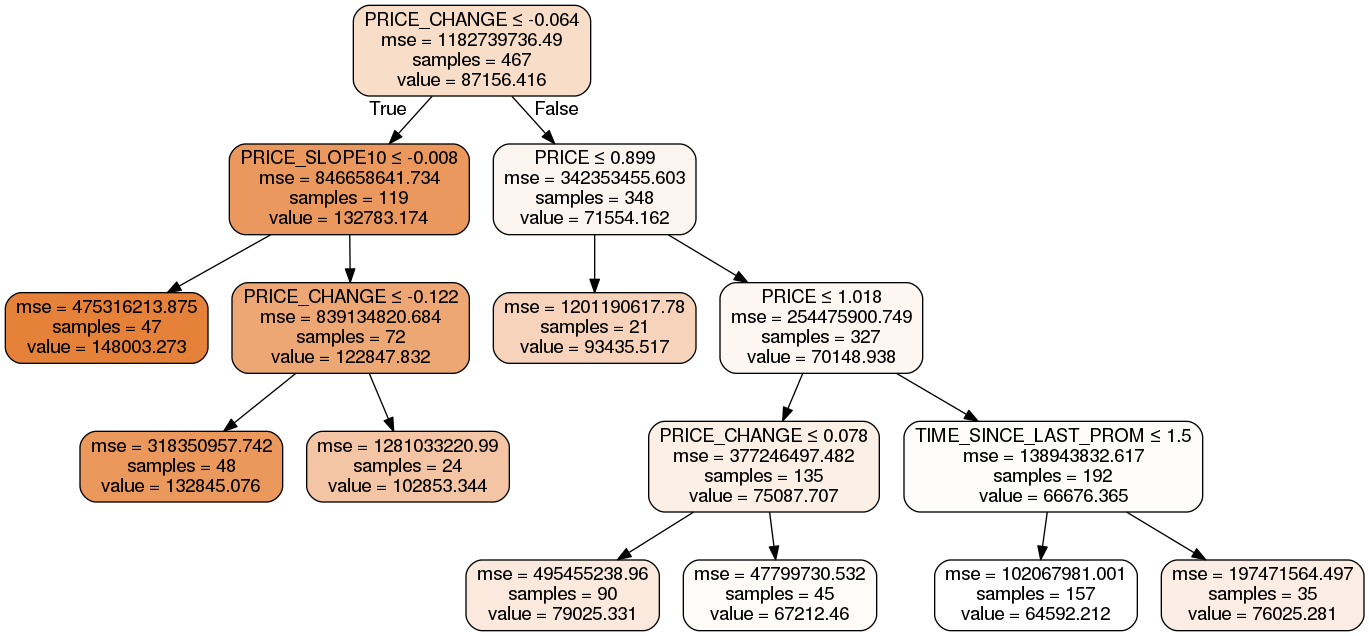

In [113]:
# Visualize data
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, 
                feature_names=X_train.columns,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=1000, height=600)

<b>Comments:</b> Makority of the predictors are focused around either the price change, the slope of the price change or the time since last promotion.

### Least Squares regression

In [114]:
import statsmodels.api as sm
from scipy import stats

In [115]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Wprice   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     44.77
Date:                Sun, 11 Feb 2018   Prob (F-statistic):           2.40e-85
Time:                        10:59:01   Log-Likelihood:                -5309.2
No. Observations:                 467   AIC:                         1.065e+04
Df Residuals:                     449   BIC:                         1.073e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.095e+

<b>Comments:</b> Let's see if we can drop some of the variables with high P score in order to obtain a better result.

In [116]:
X3 = X2.copy(deep=True)

while True:   
    loop_est = sm.OLS(list(y_train), X3)
    result = loop_est.fit()
    pvals = result.pvalues.sort_values(ascending=False)
    location = 0
    if pvals.index[0] == "const":
        location = 1
    if pvals.iloc[location] < 0.05:
        break;
    X3 = X3.drop(pvals.index[location],axis=1)
    



In [117]:
est_2 = sm.OLS(y_train, X3)
est2_2 = est_2.fit()
print(est2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Wprice   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     63.62
Date:                Sun, 11 Feb 2018   Prob (F-statistic):           2.99e-89
Time:                        10:59:05   Log-Likelihood:                -5310.4
No. Observations:                 467   AIC:                         1.065e+04
Df Residuals:                     454   BIC:                         1.070e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.201e+05   1.82e+0

<b>Comments:</b> Although all the variables now are highly signifficnt, and the overall preiciton qulity is pretty much the same. It is worth noting that again the price change is a strong predictor. 

Let's go ahead and try to improve the R^2 by adding polynomials, to see if there will be additional meaningfull result.

### Polynomial regression

In [118]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [141]:
# create a Linear Regressor   
lin_regressor = LinearRegression()

# pass the order of your polynomial here  
poly = PolynomialFeatures(2)

# convert to be used further to linear regression
X_transform = poly.fit_transform(X_train)
X_tst = poly.fit_transform(X_test)

# fit this to Linear Regressor
lin_regressor.fit(X_transform,y_train) 

# get the predictions
y_preds = lin_regressor.predict(X_tst)
score = lin_regressor.score(X_transform, y_train)
print(score)
Score2 = lin_regressor.score(X_tst, y_test)
print(Score2)

1.0
1.0


<b>Comments:</b> Obviously the train set currenty is signifficantly overfitted+ we get an R^2 = 1 which is obviously an issue. Let's try to fix that by going stepwise.

<br>

In [142]:
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(X_train.columns,p) for p in poly.powers_]]
output_df = pd.DataFrame(X_transform, columns = target_feature_names)

In [143]:
no_blank = output_df.drop("",axis=1)
Xtr2 = sm.add_constant(no_blank)
Xtr2.head()

,const,PROMOTION_A^1,PROMOTION_B^1,PROMOTION_C^1,PROMOTION_D^1,PROMOTION_E^1,TIME_SINCE_LAST_PROM^1,LAST_PROM_DUR^1,PROMOTION_WEEK^1,PROMOTION_MAV5^1,...,COMPETITOR_MIN^2,COMPETITOR_MIN^1xPRICE_TO_COMP_MIN^1,COMPETITOR_MIN^1xCOMP_PRICE_CHANGE_MIN^1,COMPETITOR_MIN^1xCOMP_SLOPE5_MIN^1,PRICE_TO_COMP_MIN^2,PRICE_TO_COMP_MIN^1xCOMP_PRICE_CHANGE_MIN^1,PRICE_TO_COMP_MIN^1xCOMP_SLOPE5_MIN^1,COMP_PRICE_CHANGE_MIN^2,COMP_PRICE_CHANGE_MIN^1xCOMP_SLOPE5_MIN^1,COMP_SLOPE5_MIN^2
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,0.8,...,0.264196,0.369,0.014392,-0.005757,0.515379,0.020101,-0.008040,0.000784,-0.000314,0.000125
1,1.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0,3.0,0.6,...,0.065025,0.871,-0.100912,-0.016575,11.666913,-1.351705,-0.222020,0.156606,0.025723,0.004225
2,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,3.0,0.6,...,0.452929,0.206,0.055182,-0.010028,0.093692,0.025098,-0.004561,0.006723,-0.001222,0.000222
3,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.0,0.0,0.4,...,0.335241,0.463,0.015399,0.025765,0.639447,0.021267,0.035585,0.000707,0.001184,0.001980
4,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.0,0.0,0.4,...,0.480249,0.414,-0.044015,0.007346,0.356890,-0.037943,0.006332,0.004034,-0.000673,0.000112


In [145]:
blank_df = Xtr2["const"]
iterable = Xtr2.drop("const",axis=1)
lastR2 = 0
col_to_add = ""

for m in range(10):
    for k in iterable.columns:
        test_df = pd.concat([blank_df,iterable[k]],axis=1)
        est = sm.OLS(list(y_train), test_df)
        est2 = est.fit()
        if est2.rsquared > lastR2:
            lastR2 = est2.rsquared
            col_to_add = k
        test_df = test_df.drop(k,axis=1)
        
    blank_df = pd.concat([blank_df,iterable[col_to_add]],axis=1) 
    
    loop_est = sm.OLS(list(y_train), blank_df)
    result = loop_est.fit()
    pvals = result.pvalues.sort_values(ascending=False)
    location = 0
    if pvals.index[0] == "const":
        location = 1
    if pvals.iloc[location] > 0.05:
         blank_df = blank_df.drop(pvals.index[location],axis=1)    
    
    
est = sm.OLS(list(y_train), blank_df)
est2 = est.fit()   
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     106.1
Date:                Sun, 11 Feb 2018   Prob (F-statistic):          2.83e-112
Time:                        11:10:31   Log-Likelihood:                -5260.1
No. Observations:                 467   AIC:                         1.054e+04
Df Residuals:                     456   BIC:                         1.059e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


<b>Comments:</b> We end up with a (relatively) small enough subset of signifficant parameters, on a model having acceptable R2 value. However with the polynomial terms, we are not sure that ll the variables have compareble ranges, so let's go ahead and fix that.


In [146]:
descr = blank_df.describe().transpose()
descr["range"] = descr["max"]-descr[min]
mean_range = np.mean(descr["range"])
weights = mean_range/descr["range"]
coeffs = pd.concat([result.params, weights],axis=1)
final_weights = (coeffs[0]*coeffs["range"]).sort_values()
print(final_weights)

COMPETITOR_MIN^1xCOMP_SLOPE5_MIN^1     -3.143025e+07
PROMOTION_D^1xCOMP_SLOPE5_MIN^1        -2.076131e+07
PRICE^1                                -1.487011e+07
PROMOTION_MAV5^1xPRICE_CHANGE^1        -3.810381e+06
LAST_PROM_DUR^2                        -4.547857e+01
PROMOTION_A^1xTIME_SINCE_LAST_PROM^1    2.259503e+04
PROMOTION_E^1xTIME_SINCE_LAST_PROM^1    3.574012e+04
PROMOTION_D^1xPRICE_TO_COMP_MIN^1       1.088079e+05
PRICE^2                                 3.183628e+06
PRICE_CHANGE^2                          1.524925e+07
const                                            inf
dtype: float64


<b>Comments:</b> Resuls of the Polynomial stepwise regression are debatable and might need further, in-depth analysis. The results suggest that:
<ul><li>Any price change is a good one.</li>
    <li>Promotion D success is mainly related to the actions of our competitors</li>
    <li>Promotions A and E play well, when there was no other promotion in the near past</li>
    <ul>



# Results interpretation

<b>Summary:</b> we have explored the several approaches to determining the major drivers and effects of promotional campagins carriend out in the dataset. Both exploratory analysis, simple decision trees and various regressions suggest promotional activities with short duration, and steep price changes are what drives the sales.


# Results application

Strategy for sales, based on the result suggests:
<li>Frequent but short promotions.
<li>Duration of the promotions not more than a week.
<li>Gap between the promotions of around 2 weeks.
<li>Price drop of at least 6.8% on each promotion.